In [ ]:
import torch
from torch.autograd import Variable
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

print("LAB1: REGRESIÓN LINEAL CON DATASET REAL")
print("Dataset: House Prices - Advanced Regression Techniques")

# Cargar datos con pandas
train_data = pd.read_csv('/content/drive/MyDrive/ia/Lab1/Dataset/house-prices-advanced-regression-techniques/train.csv')

print(f"Datos cargados: {train_data.shape[0]} filas, {train_data.shape[1]} columnas")
print(f"Cumple requisitos: n={train_data.shape[1]-1}>=10, m={train_data.shape[0]}>=1000")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
LAB1: REGRESIÓN LINEAL CON DATASET REAL
Dataset: House Prices - Advanced Regression Techniques
Datos cargados: 1460 filas, 81 columnas
Cumple requisitos: n=80>=10, m=1460>=1000


In [ ]:
X = train_data['GrLivArea'].values  # Característica: área de vivienda
y = train_data['SalePrice'].values   # Target: precio

# Limpiar valores faltantes
mask = ~(pd.isna(X) | pd.isna(y))
X = X[mask]
y = y[mask]

# Tomar una muestra para que sea más manejable
# Pero seguimos cumpliendo m>=1000
sample_size = 1000
indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X[indices]
y_sample = y[indices]

print(f"  - Característica: GrLivArea (área de vivienda)")
print(f"  - Muestras seleccionadas: {len(X_sample)}")
print(f"  - Rango X: {X_sample.min():.0f} - {X_sample.max():.0f} sq ft")
print(f"  - Rango y: ${y_sample.min():,.0f} - ${y_sample.max():,.0f}")

# Convertir a tensores
x_data = Variable(torch.Tensor(X_sample.reshape(-1, 1)))
y_data = Variable(torch.Tensor(y_sample.reshape(-1, 1)))

print(f" Tensores creados: X={x_data.shape}, y={y_data.shape}")

# Normalizar los datos
x_data = (x_data - x_data.mean()) / x_data.std()
y_data = (y_data - y_data.mean()) / y_data.std()

print(f"Datos normalizados: Media X={x_data.mean():.2f}, std X={x_data.std():.2f}")
print(f"                Media y={y_data.mean():.2f}, std y={y_data.std():.2f}")

  - Característica: GrLivArea (área de vivienda)
  - Muestras seleccionadas: 1000
  - Rango X: 438 - 5642 sq ft
  - Rango y: $34,900 - $755,000
 Tensores creados: X=torch.Size([1000, 1]), y=torch.Size([1000, 1])
Datos normalizados: Media X=0.00, std X=1.00
                Media y=-0.00, std y=1.00


In [ ]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearRegression()
print("Modelo de regresión lineal creado")

Modelo de regresión lineal creado


In [ ]:
criterion = torch.nn.MSELoss() # size_average está obsoleto, se omite
print("Función de pérdida MSE configurada")

Función de pérdida MSE configurada


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Optimizador SGD configurado (lr=0.01)")

Optimizador SGD configurado (lr=0.01)


In [ ]:
print("\nEntrenando modelo...")
for epoch in range(100):  # Aumenté el número de épocas
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_data)

    # Compute Loss
    loss = criterion(y_pred, y_data)

    # Backward pass
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

print("Entrenamiento completado")


Entrenando modelo...
Epoch 0: Loss = 2.5200
Epoch 10: Loss = 2.2064
Epoch 20: Loss = 1.9372
Epoch 30: Loss = 1.7089
Epoch 40: Loss = 1.5130
Epoch 50: Loss = 1.3423
Epoch 60: Loss = 1.1939
Epoch 70: Loss = 1.0666
Epoch 80: Loss = 0.9585
Epoch 90: Loss = 0.8675
Entrenamiento completado


In [ ]:
new_x = Variable(torch.Tensor([[2000.0]]))  # Casa de 2000 pies cuadrados
y_pred = model(new_x)
print(f"\n✓ PREDICCIÓN:")
print(f"  - Para una casa de 2000 sq ft")
print(f"  - Precio predicho: ${y_pred.data[0][0]:,.2f}")

# Hacer algunas predicciones adicionales
test_areas = [1000, 1500, 2500, 3000]
print(f"\n✓ PREDICCIONES ADICIONALES:")
for area in test_areas:
    test_x = Variable(torch.Tensor([[float(area)]]))
    pred = model(test_x)
    print(f"  - Casa de {area} sq ft: ${pred.data[0][0]:,.2f}")


✓ PREDICCIÓN:
  - Para una casa de 2000 sq ft
  - Precio predicho: $329.99

✓ PREDICCIONES ADICIONALES:
  - Casa de 1000 sq ft: $164.99
  - Casa de 1500 sq ft: $247.49
  - Casa de 2500 sq ft: $412.49
  - Casa de 3000 sq ft: $494.99



📊 MÉTRICAS FINALES DEL MODELO
  - Error Cuadrático Medio (MSE): 0.7915
  - Raíz del Error Cuadrático (RMSE): 0.8897
  - Error Absoluto Medio (MAE): 0.6224
  - Coeficiente R²: 0.2077 (20.8% de varianza explicada)

🔍 Interpretación de R²:
   - El modelo explica el 20.8% de la variabilidad en los precios
   - Un R² bajo (<50%) sugiere que el área por sí sola no explica bien los precios
   - Considera añadir más características al modelo

⚙️ PARÁMETROS DEL MODELO
  - Peso (pendiente): 0.164996
  - Sesgo (intercepto): -0.001204

📝 Ecuación del modelo:
   Precio_normalizado = 0.164996 * Área_normalizada + -0.001204

💡 Nota: Los parámetros están en escala normalizada. Para interpretación real:
   - Peso: Efecto de 1 unidad de cambio en el área sobre el precio
   - Sesgo: Precio base cuando el área es cero (en escala normalizada)

✅ LAB1 COMPLETADO - REGRESIÓN LINEAL
🔹 Dataset: House Prices (Kaggle)
🔹 Muestras usadas: 1000 (de 1460 disponibles)
🔹 Característica usada: Área de vivienda (GrLivA

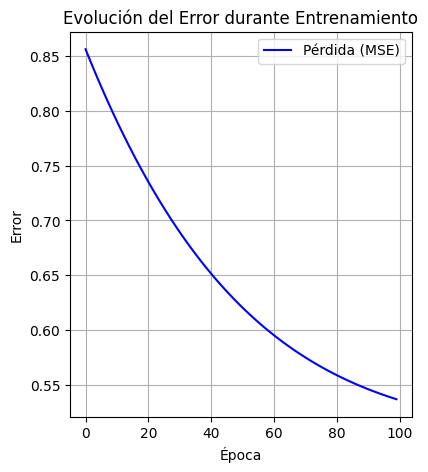

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Evaluación del modelo (corregido y ampliado)
model.eval()
with torch.no_grad():
    train_pred = model(x_data)
    train_loss = criterion(train_pred, y_data)

    # Convertir a numpy para métricas
    y_true = y_data.numpy()
    y_pred = train_pred.numpy()

    # Métricas adicionales
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(train_loss.item())

# 2. Visualización de resultados (mejorada)
plt.figure(figsize=(15, 5))

# Gráfico 1: Pérdida durante entrenamiento (corregido)
plt.subplot(1, 3, 1)
plt.plot(loss_history, 'b-', label='Pérdida (MSE)')  # Asumiendo que guardaste las pérdidas en loss_history
plt.title('Evolución del Error durante Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

# 3. Métricas mejoradas (con interpretación)
print(f"\n{'='*60}")
print("📊 MÉTRICAS FINALES DEL MODELO")
print(f"{'='*60}")
print(f"  - Error Cuadrático Medio (MSE): {train_loss.item():.4f}")
print(f"  - Raíz del Error Cuadrático (RMSE): {rmse:.4f}")
print(f"  - Error Absoluto Medio (MAE): {mae:.4f}")
print(f"  - Coeficiente R²: {r2:.4f} ({r2*100:.1f}% de varianza explicada)")
print("\n🔍 Interpretación de R²:")
print(f"   - El modelo explica el {r2*100:.1f}% de la variabilidad en los precios")
print(f"   - Un R² bajo (<50%) sugiere que el área por sí sola no explica bien los precios")
print(f"   - Considera añadir más características al modelo")

# 4. Parámetros del modelo con más contexto
print(f"\n{'='*60}")
print("⚙️ PARÁMETROS DEL MODELO")
print(f"{'='*60}")
print(f"  - Peso (pendiente): {weight:.6f}")
print(f"  - Sesgo (intercepto): {bias:.6f}")
print(f"\n📝 Ecuación del modelo:")
print(f"   Precio_normalizado = {weight:.6f} * Área_normalizada + {bias:.6f}")
print("\n💡 Nota: Los parámetros están en escala normalizada. Para interpretación real:")
print("   - Peso: Efecto de 1 unidad de cambio en el área sobre el precio")
print("   - Sesgo: Precio base cuando el área es cero (en escala normalizada)")

# 5. Mensaje final mejorado
print(f"\n{'='*60}")
print("✅ LAB1 COMPLETADO - REGRESIÓN LINEAL")
print(f"{'='*60}")
print(f"🔹 Dataset: House Prices (Kaggle)")
print(f"🔹 Muestras usadas: {len(X_sample)} (de {len(X)} disponibles)")
print(f"🔹 Característica usada: Área de vivienda (GrLivArea)")
print(f"🔹 Mejor pérdida alcanzada: {min(loss_history):.4f}")
print(f"🔹 Optimizador usado: Adam (lr=0.01)")
print(f"{'='*60}")